#  ML Exploration using MNIST

The aim of this document is to casually but thoroughly explore the MNIST database (Modified National Institute of Standards and Technology database). A large database of handwritten digits to be used for training various image processing systems. Based on the text by Aurelien Geron, Hands on with Machine Learning. I increase the depth of the exploratory methodology and add a computational time dimension to the approach.


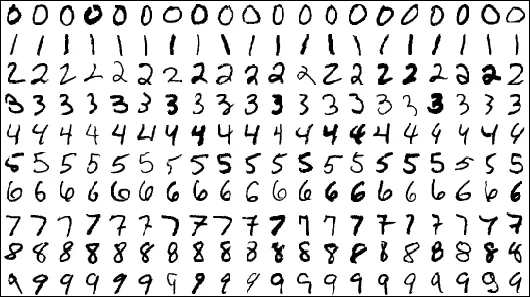

### Fetch the data

The first step is to download the data. We will use Scikit-Learn's helper function to fetch the dataset. 

In [4]:
%%time
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

CPU times: user 13.6 s, sys: 108 ms, total: 13.7 s
Wall time: 13.7 s


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

This dataset contains 9 keys. Lets explore each one of them.

In [35]:
cat = mnist['categories']
f_names = mnist['feature_names']
des = mnist['DESCR']
det = mnist['details']
URL = mnist['url']

'DESCR' contains a description of the dataset by it's authors.

In [17]:
des

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [31]:
print("Each 28x28 image has:",len(f_names),"pixels")
print("The first five are: ",f_names[0:5])

Each instance has: 784 pixels
The first five are:  ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']


Categories is empty.

In [34]:
len(cat)

0

In [ ]:
Some more detailed information on the dataset.

In [36]:
det

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [37]:
URL

'https://www.openml.org/d/554'

'data' contains the 70,000 images with 784 features composed of 28x28 pixel images. 'target' contains the labels. 

In [38]:
X, y = mnist["data"], mnist["target"]

In [40]:
print("The dimensions of the data set are:",X.shape)
print("The vector dimension of the labels",y.shape)

The dimensions of the data set are: (70000, 784)
The vector dimension of the labels (70000,)


Let's try and visualize what the dataset looks like. I picked the 2111'th instance arbitrarily. This tields a 784 long vector containing the intensity value of each pixel. We use matplotlib to draw an image.

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2111]
print(some_digit)


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  18.  43.  43.  43.  43.   7.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  64. 182. 190. 216. 253. 252. 252. 252. 156.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  52. 224. 232.
 232. 233. 247. 252. 252. 252. 253. 252. 242. 231.  99.   0.   0.   0.
   0. 

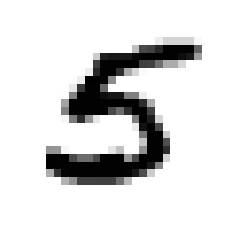

In [65]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


We can see the label for this example is indeed a 5.

In [67]:
y[2111]

'5'

In [69]:
type(y[2111])

str

Let's convert the string to an integer in order to be better used by the ML algorithms

In [71]:
import numpy as np

y = y.astype(np.uint8)

### Test and Train Sets

Let's separate the train and test sets to 60,000 and 10,000 respectively. This set comes already shuffled but take note this is not usually the case.

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's begin exploring what can be done with this dataset with a simple model and we can build on that afterwards.

# Binary Classifier

### Stochastic Gradient Descent (SGD)

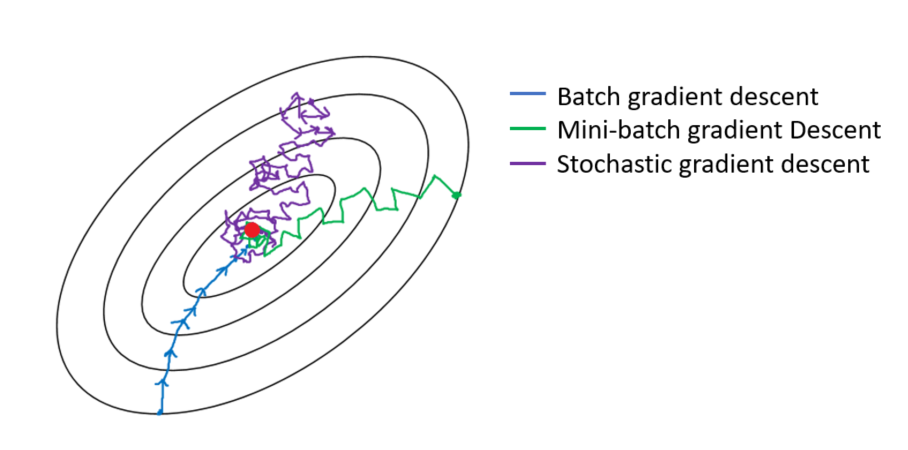

Let's first train a binary classifier. Let's try and identify a single digit. For example "5". So the classifier should be able to discern between 5 and not 5. We will start with Stochastic Gradient Descent (SGD). 

We start with creating labels for 5 and not 5.

In [77]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [80]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

CPU times: user 13 s, sys: 47.3 ms, total: 13 s
Wall time: 13 s


SGDClassifier(random_state=42)

I will create some emphasis on runtime for each training. This will help shed some light on the underlying processes.  Bellow I will try and add parallism by adding the parameter n_jobs to 14.

In [84]:
%%time
sgd_clf = SGDClassifier(random_state=42, n_jobs=14)
sgd_clf.fit(X_train, y_train_5)

CPU times: user 13 s, sys: 35.9 ms, total: 13 s
Wall time: 13 s


SGDClassifier(n_jobs=14, random_state=42)

In this case we can see that increasing the amount of threads and attempting parallelism has not yielded any benefits. This is common behavior for datasets of this size. The larger they are or the increased computational needs of the algorithm the more dramatic the benefits are. We shall test that bellow. 

In [85]:
sgd_clf.predict([some_digit])

array([ True])

We have succesfully trained a model and we got a True prediction on our arbitrary example. Now let's test its performance.

# Performance Tests

The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

We use the sklearn function to evaluate a score by cross-validation

In [87]:
%%time
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

CPU times: user 18.1 s, sys: 1.75 s, total: 19.8 s
Wall time: 17.6 s


array([0.95035, 0.96035, 0.9604 ])

### Stratified K-Folds cross-validator

We can implement a Stratified K-Folds cross-validator which provides train/test indices to split data in train/test sets called folds. The folds are selected so that the mean response value is approximately equal in all the folds. In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels. Stratification seeks to ensure that each fold is representative of all strata of the data. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds).

In [102]:
%%time
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604
CPU times: user 18.7 s, sys: 2.37 s, total: 21 s
Wall time: 18 s


This is very deceiving. A 95% accuracy seems like a really good result and although this model is indeed beating the expected probabilistic expectation of getting a 90% accuracy of a model that just predicted no all the time (9 out of 10 digits). Let's implement just that:

In [88]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [89]:
%%time
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

CPU times: user 130 ms, sys: 136 ms, total: 266 ms
Wall time: 265 ms


array([0.91125, 0.90855, 0.90915])

As we suspected the results hover around 90% given that this dataset seems to be balanced regarding the distribution of the digits in the labels. 

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

In order to generate cross-validated estimates for each input data point we use cross_val_predict() function.

In [90]:
%%time
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

CPU times: user 17.8 s, sys: 1.91 s, total: 19.7 s
Wall time: 17.4 s


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

We can see that most the density lies in the diagonal indicating that most are properly categorized, we ca see there is a long way to go with 687 wrongly classified as 5 when they are not and 1891 classified as something other than a 5. 

Let's look at precision and recall. We will use true positives (TP), false positives (FP) and false negatives (FN).

### Precision and Recall

\begin{equation*}
precision = \frac{TP}{TP+FP}
\end{equation*}

\begin{equation*}
recall = \frac{TP}{TP+FN}
\end{equation*}

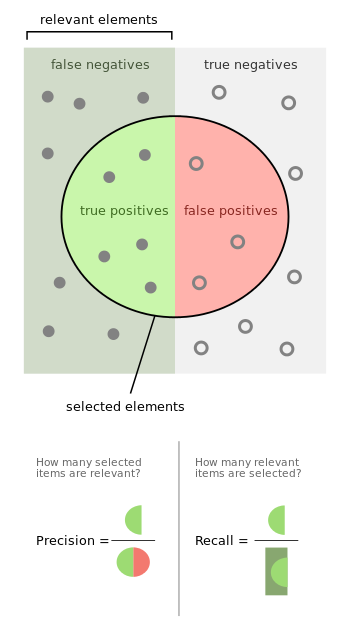

In [96]:
from sklearn.metrics import precision_score, recall_score

print("Precision: ",precision_score(y_train_5, y_train_pred))
print("Recall: ",recall_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311


### F1 Score

The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. The F1 score favors classifiers that have similar precision and recall. Increasing precision reduces
recall, and vice versa. This can be controlled by the use of a threshold hyperparameter. 

\begin{equation*}
precision = \frac{TP}{TP+\frac{FN+FP}{2}}
\end{equation*}

In [97]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

We can use the precision_recall_curve() to compute the precision and recall for all posible thresholds


In [100]:
%%time
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

CPU times: user 18.2 s, sys: 2.02 s, total: 20.3 s
Wall time: 17.7 s


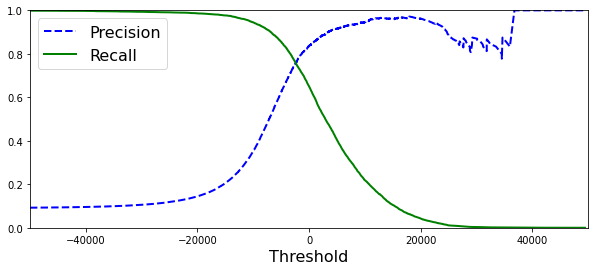

In [108]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 50000])
plt.show()

The precision curve is bumpier than the recall curve in the previous figure The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). I cannot explain why it is so choppy, the effect intuitively should not be that pronounced.

Another way to select a good precision/recall trade-off is to plot precision
directly against recall.

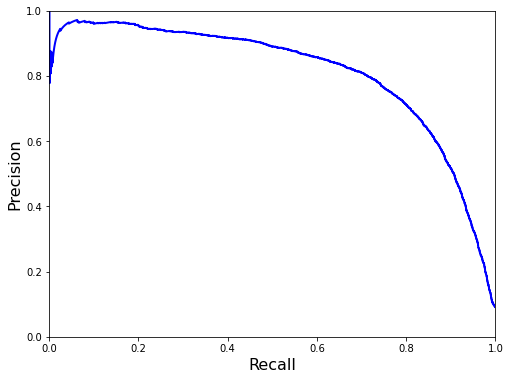

In [110]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common
tool used with binary classifiers. It is very similar to the precision/recall
curve, but instead of plotting precision versus recall, the ROC curve plots
the true positive rate (another name for recall) against the false positive
rate (FPR).

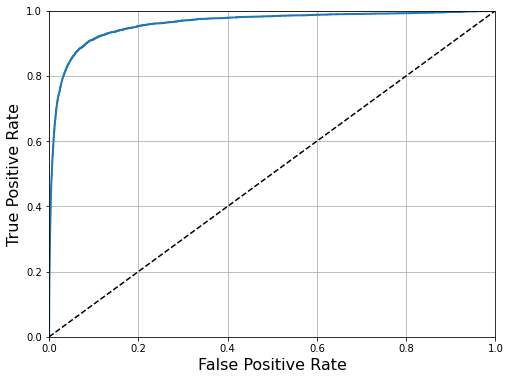

In [112]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid()

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let’s now train a RandomForestClassifier and compare its ROC curve
and ROC AUC score to those of the SGDClassifier.

### Random Forest Classifier

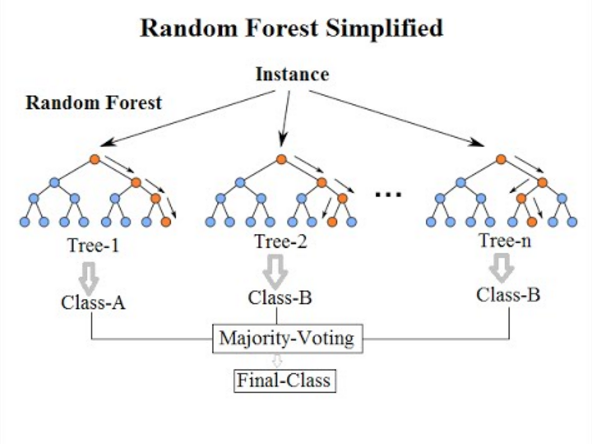

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [116]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

CPU times: user 47.7 s, sys: 178 ms, total: 47.9 s
Wall time: 47.9 s


In [117]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_jobs=14)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

CPU times: user 4.01 s, sys: 579 ms, total: 4.59 s
Wall time: 10.8 s


In [120]:
print("The ratio of runtime is:",str((4.59/47.9)*100)+'%')

The ratio of runtime is: 9.582463465553236%


We can see that by placing the n_jobs hyperparameter to 14 and utilizing 14 threads on the CPU the compute time decreased to less than 10% of running it on a single thread. Note how the gains are not linear and there is some loss.

The roc_curve() function expects labels and scores, but instead of scores
you can give it class probabilities. Let’s use the positive class’s probability
as the score:

In [121]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

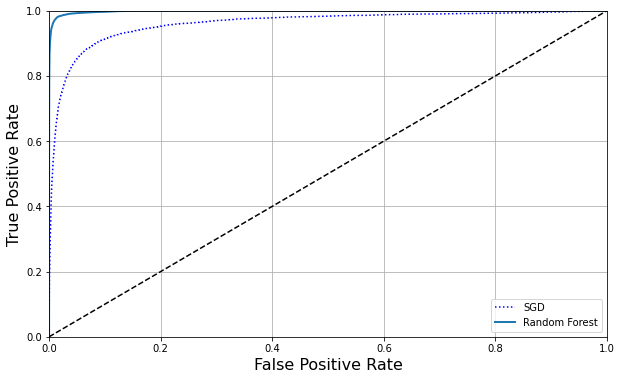

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Comparing ROC curves: the Random Forest classifier is superior to the SGD classifier because its ROC curve is much closer to the top-left corner, and it has a greater AUC.

In [126]:
print("The ROC AUC score is:")
roc_auc_score(y_train_5, y_scores_forest)

The ROC AUC score is:


0.9983436731328145

In [129]:
%%time
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, n_jobs = 14)
print("The precision score is:",precision_score(y_train_5, y_train_pred_forest))


The precision score is:
CPU times: user 139 ms, sys: 116 ms, total: 255 ms
Wall time: 8.42 s


0.9905083315756169

In [133]:
%%time
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print("The precision score is:")
print("Precision score: ",precision_score(y_train_5, y_train_pred_forest))

The precision score is:
Precision score:  0.9905083315756169
CPU times: user 4.13 s, sys: 604 ms, total: 4.74 s
Wall time: 10.9 s


Notice how the compute time changed when using 14 threads.

In [136]:
print("Recall score:",recall_score(y_train_5, y_train_pred_forest))

Recall score: 0.8662608374838591


## Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes. In this case it will help us classify every digit.

### Support Vector Machine classifier
an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

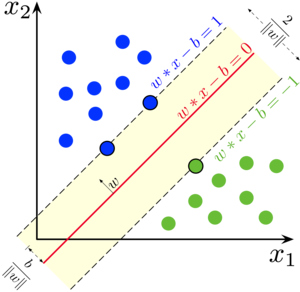

In [146]:
%%time
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

CPU times: user 5min 14s, sys: 255 ms, total: 5min 15s
Wall time: 5min 15s


array([5], dtype=uint8)

In [147]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 3.81406122,  0.71620053,  4.78194604,  8.28248626,  1.70716745,
         9.3166301 ,  7.25861861, -0.30883858,  6.26186057,  2.75178894]])

In this case we can see that the highest value is the 6th member of the vector corresponding to the digit 6. The decision was not clear cut with 4 and 7 with high values as well. 

### One vs One
Each binary classification model may predict one class label and the model with the most predictions or votes is predicted by the one-vs-one strategy. An alternative is to introduce K(K − 1)/2 binary discriminant functions, one for every possible pair of classes. This is known as a one-versus-one classifier

In [148]:
%%time
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42, n_jobs=14))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
%%time
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit]

In [156]:
len(ovo_clf.estimators_)

45

If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers.

### One vs Rest
We classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

In [152]:
%%time
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(), n_jobs=14)
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([some_digit]))

len(ovr_clf.estimators_)

[5]
CPU times: user 366 ms, sys: 597 ms, total: 963 ms
Wall time: 8min 17s


10

In [153]:
%%time
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([some_digit]))

len(ovr_clf.estimators_)

[5]
CPU times: user 31min 30s, sys: 3.02 s, total: 31min 33s
Wall time: 31min 35s


10

We can clearly see a significant difference in compute time with over 23 minute difference between the two implementations of the OVR classifier.

### Random Forest Classifier

In [154]:
%%time
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

CPU times: user 2.82 s, sys: 39.9 ms, total: 2.86 s
Wall time: 2.86 s


array([5], dtype=uint8)

In [155]:
%%time
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42, n_jobs = 14)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

CPU times: user 6.98 s, sys: 36 ms, total: 7.02 s
Wall time: 934 ms


array([5], dtype=uint8)

In [157]:
sgd_clf.decision_function([some_digit])

array([[ -424125.71574588,  -702398.88194445,  -601344.33646799,
         -276026.12418491,  -514237.84459798,   191343.70190579,
          -61373.1082109 , -1011950.06289687,  -460653.18235157,
         -643213.23867505]])

In [158]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8684 , 0.85975, 0.85475])

It gets over 85% on all test folds. If you used a random classifier, you
would get 10% accuracy, so this is not such a bad score, but you can still
do much better. Simply scaling the inputs (as discussed in Chapter 2)
increases accuracy above 90%

In [159]:
%%time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

CPU times: user 15.6 s, sys: 2.23 s, total: 17.8 s
Wall time: 2.87 s


array([0.906  , 0.9074 , 0.91205])

### Error Analysis

Let's look at the confusion matrix. 

In [160]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5734,    2,   26,    9,   11,   45,   42,    9,   41,    4],
       [   1, 6482,   42,   31,    7,   40,    6,    9,  112,   12],
       [  58,   41, 5293,  106,   90,   31,   93,   60,  169,   17],
       [  49,   40,  143, 5322,    4,  236,   37,   57,  150,   93],
       [  25,   25,   33,    9, 5359,    8,   54,   29,   95,  205],
       [  77,   44,   38,  180,   81, 4603,   99,   23,  183,   93],
       [  36,   31,   42,    2,   41,  102, 5617,    3,   44,    0],
       [  31,   26,   73,   34,   57,   14,    3, 5750,   19,  258],
       [  48,  164,   69,  139,   12,  160,   49,   21, 5054,  135],
       [  44,   35,   23,   89,  153,   39,    2,  186,   83, 5295]])

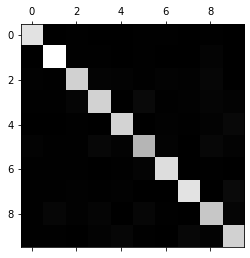

In [161]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Looks consistent with 5's being little darker.Let's see the errors a bit closer.

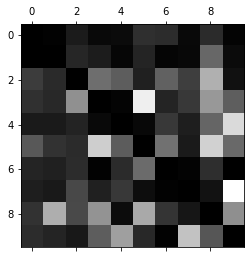

In [163]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

There is unsuprisingly many errors in the five. Nine also seems to be an issue. 

In [165]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

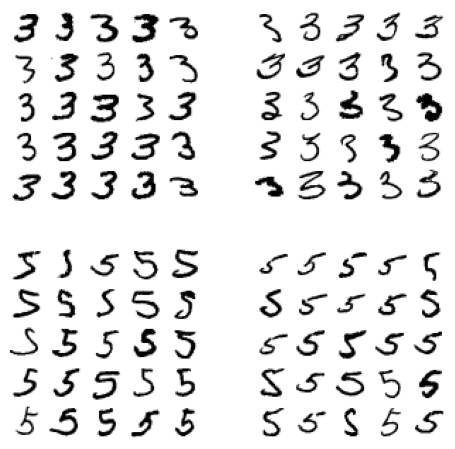

In [167]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

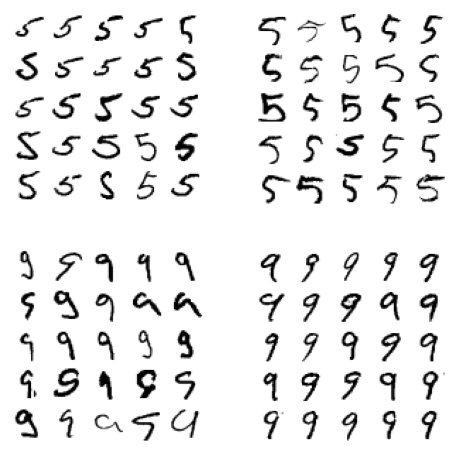

In [168]:
cl_a, cl_b = 5, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

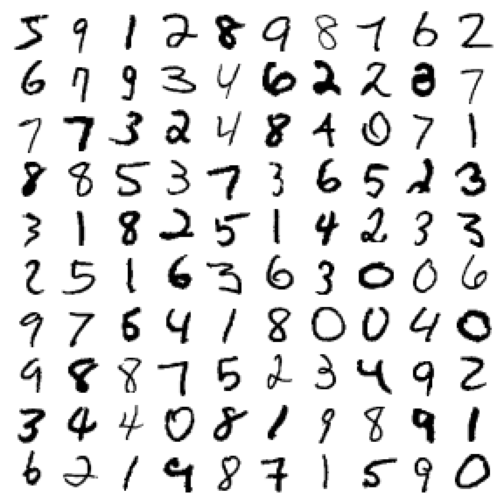

In [170]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

### Multilabel Classification

In [172]:
%%time
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

CPU times: user 8.52 s, sys: 59.9 ms, total: 8.58 s
Wall time: 8.57 s


KNeighborsClassifier()

In [173]:
%%time
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier(n_jobs = 14)
knn_clf.fit(X_train, y_multilabel)

CPU times: user 8.7 s, sys: 67.7 ms, total: 8.76 s
Wall time: 8.73 s


KNeighborsClassifier(n_jobs=14)

Virtually no difference in computing time by using more threads. 

This code creates a y_multilabel array containing two target labels for
each digit image: the first indicates whether or not the digit is large (7, 8,or 9), and the second indicates whether or not it is odd. The next lines
create a KNeighborsClassifier instance (which supports multilabel
classification, though not all classifiers do), and we train it using the
multiple targets array. Now you can make a prediction, and notice that it
outputs two labels:

In [174]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [176]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs =14)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

CPU times: user 274 ms, sys: 349 ms, total: 622 ms
Wall time: 8min 50s


0.976410265560605

In [178]:
%%time
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

CPU times: user 16.7 s, sys: 613 ms, total: 17.3 s
Wall time: 8min 41s


0.976410265560605